 **<font size=6 color="red" > MML Assignment 2<font size color>**
 
**<font size=2>MT2021147 - Tushar sharma<font size>**

In [18]:
import matplotlib.pyplot as plot
import numpy as np
import heapq

from sklearn.metrics import mean_squared_error as mse


In [19]:
## Initialisation of random 10X10 matrix and making it symmetric
np.random.seed(1)
A = np.random.randint(15, size=(10, 10))
symm= A.T @ A
symm

array([[ 506,  508,  637,  516,  486,  511,  276,  416,  497,  412],
       [ 508,  672,  591,  608,  535,  608,  406,  411,  408,  367],
       [ 637,  591, 1059,  701,  756,  738,  382,  642,  670,  580],
       [ 516,  608,  701,  709,  581,  623,  477,  502,  455,  395],
       [ 486,  535,  756,  581,  614,  595,  404,  511,  456,  438],
       [ 511,  608,  738,  623,  595,  792,  430,  524,  585,  454],
       [ 276,  406,  382,  477,  404,  430,  485,  344,  195,  287],
       [ 416,  411,  642,  502,  511,  524,  344,  623,  432,  428],
       [ 497,  408,  670,  455,  456,  585,  195,  432,  717,  457],
       [ 412,  367,  580,  395,  438,  454,  287,  428,  457,  523]])

**<font size=3> SKLEARN functuion for EIGEN VALUES<font size>**

In [20]:


eval, evec = np.linalg.eig(symm)
t = heapq.nlargest(5, eval)
print(t)

[5247.489684316448, 532.601167229548, 290.42922272222813, 207.60805694832263, 158.20624352126546]


**<font size=3> Power Iteration method <font size>**

In [21]:
def cal_eval(A, l):
  return (l.T @ A @ l)/(l.T @ l)

In [22]:



def power_iteration_function(A, i):
  ## initialising eigenvector matrix
  V = np.random.randint(10, size=(10, 10))

  ## QR Factorisation
  Q, R = np.linalg.qr(V)

  ## iteratively finding the eigenvectors 
  for o in range(1, i):
    u= A @ Q
    Q, R = np.linalg.qr(u)

  ## finding eigen values corresponding to the eigen vectors calculated in above step
  evals=[]
  for o in range(10):
    evals.append(cal_eval(A, (np.array(Q).T)[o]))


  t=heapq.nlargest(5, evals)

  return t

In [23]:
e=[]
i=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for o in i:
  s = power_iteration_function(symm, o)
  e.append(mse(t, s))

print(e)

[145.474083453912, 0.6154407296039613, 0.00034489835899747764, 0.0005723343788233611, 5.9042236212066945e-09, 3.273061201039416e-11, 2.080854204680278e-12, 5.728010920518463e-13, 1.4704752592505303e-12, 1.345153156832303e-10]


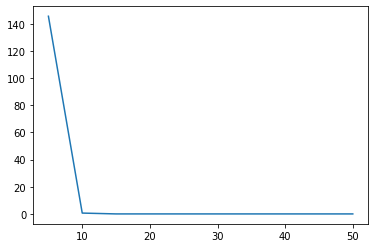

In [24]:
plot.plot(i, e)
plot.show()